<a href="https://colab.research.google.com/github/NervOUs11/Cat_or_Dog/blob/main/CatVSDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

In [54]:
#Load dataset from tensorflow
(data_train, data_test), data_info = tfds.load("cats_vs_dogs",
                       split=['train[:80%]', 'train[80%:]'],
                       as_supervised=True,
                       with_info=True,
                       shuffle_files=True)

In [55]:
#Show info
data_info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='~/tensorflow_datasets/cats_vs_dogs/4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and

In [56]:
for images, labels in data_train:
    x_train = images.numpy()
    y_train = labels.numpy()

In [57]:
x_train

array([[[131, 145, 148],
        [133, 147, 150],
        [138, 152, 155],
        ...,
        [129, 131, 128],
        [123, 125, 122],
        [123, 125, 122]],

       [[134, 148, 151],
        [133, 147, 150],
        [139, 153, 156],
        ...,
        [127, 129, 126],
        [128, 130, 127],
        [128, 130, 127]],

       [[137, 151, 154],
        [134, 148, 151],
        [139, 153, 156],
        ...,
        [130, 132, 127],
        [131, 133, 128],
        [131, 133, 128]],

       ...,

       [[226, 223, 190],
        [249, 245, 216],
        [236, 232, 205],
        ...,
        [246, 247, 233],
        [250, 251, 237],
        [240, 241, 227]],

       [[240, 238, 200],
        [255, 251, 222],
        [248, 243, 223],
        ...,
        [254, 255, 239],
        [245, 246, 232],
        [251, 252, 238]],

       [[226, 223, 188],
        [240, 236, 211],
        [252, 246, 232],
        ...,
        [245, 246, 228],
        [232, 233, 217],
        [255, 255, 241]]

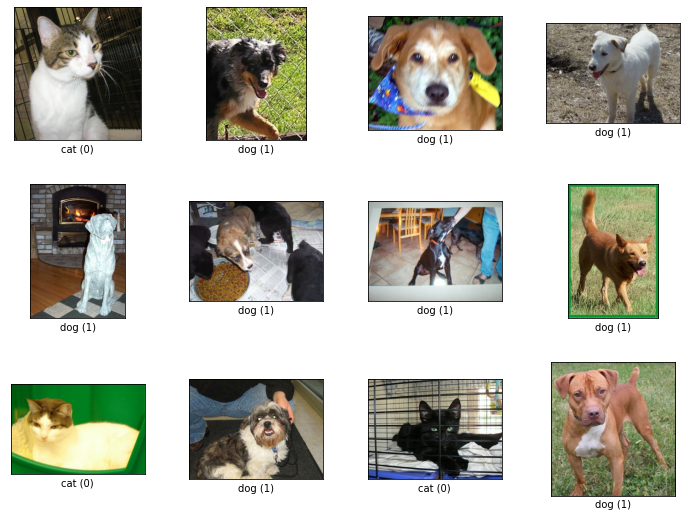

In [58]:
#Show example image
show = tfds.show_examples(data_train, data_info, rows=3, cols=4)

In [59]:
# Resize image
AUTO = tf.data.experimental.AUTOTUNE
def resize_image(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32) 
    image = tf.image.resize(image, (256, 256))  
    return (image, label)

data_train = data_train.map(resize_image).prefetch(AUTO)

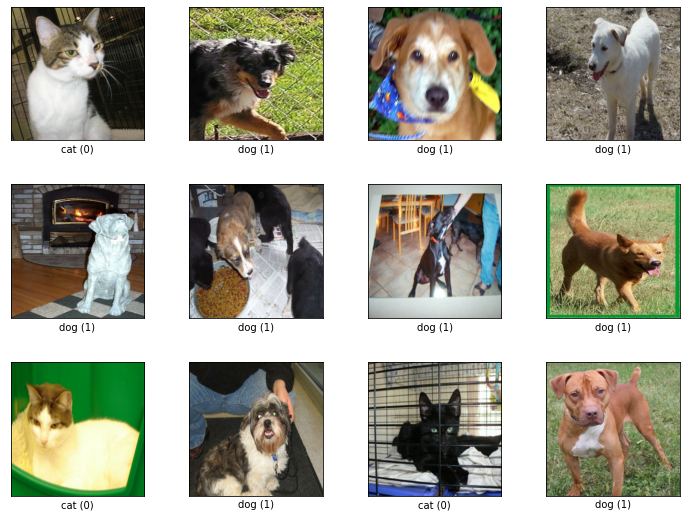

In [60]:
# show image
show = tfds.show_examples(data_train, data_info, rows=3, cols=4)

In [61]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D 

# Build model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (256,256,3)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256, 256, 32)      128       
                                                                 
 conv2d_2 (Conv2D)           (None, 254, 254, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 123008)           

In [63]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [65]:
type(x_train)

numpy.ndarray

In [66]:
type(y_train)

numpy.int64

In [64]:
# Train model
history = model.fit(x_train, y_train, epochs=10)

ValueError: ignored

In [ ]:
# Test model

In [ ]:
# Upload new image file to the model